In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [92]:
wecode=pd.read_csv("/content/drive/MyDrive/wecode.csv",engine='python')
score=pd.read_csv("/content/drive/MyDrive/score_training.csv",engine='python')

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
wecode.info() #thông tin file wecode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [96]:
score.info() #thông tin file score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


#**Lọc dữ liệu từ file WECODE**

In [97]:
# tạo DF mới với các cột cần thiết
new_data = pd.DataFrame({'user_id': wecode['user_id'],
                         'sum_problems': wecode['is_final'],
                         'sum_submits': 1,
                         'sum_pre_score': wecode['pre_score']==10000,
                         'correct_probs': map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)),
                         'pre_score':wecode['pre_score'],})


In [98]:
# group theo id
new_data = new_data.groupby('user_id').sum()
new_data['times']=new_data['sum_submits']/new_data['correct_probs']
new_data['percent']=1/new_data['times']
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
new_data = new_data.dropna()
new_data

,sum_problems,sum_submits,sum_pre_score,correct_probs,pre_score,times,percent
user_id,,,,,,,
1,2,2,1,1,10000,2.000000,0.500000
4,38,54,44,37,466000,1.459459,0.685185
5,5,6,3,3,30000,2.000000,0.500000
6,88,130,89,85,965637,1.529412,0.653846
11,12,50,19,9,317268,5.555556,0.180000
...,...,...,...,...,...,...,...
1860,48,76,29,28,405440,2.714286,0.368421
1862,6,12,4,4,40000,3.000000,0.333333
1864,63,187,30,28,563292,6.678571,0.149733


#**Lọc dữ liệu file score**

In [99]:
temp=pd.DataFrame({'user_id':score['id'],'CK':score['CK']})
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  975 non-null    int64 
 1   CK       974 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB


In [100]:
temp = temp.where(temp.CK != '\xa0') # Xóa ' '
temp = temp.where(temp.CK == temp.CK) # Xóa nan
temp

,user_id,CK
0,22.0,8.5
1,24.0,9.5
2,27.0,10
3,28.0,9.5
4,29.0,8.5
...,...,...
970,1857.0,4
971,1859.0,1.5
972,1862.0,7.5
973,1865.0,7.5


In [101]:
data=pd.merge(new_data,temp,how='inner',on='user_id')
data

,user_id,sum_problems,sum_submits,sum_pre_score,correct_probs,pre_score,times,percent,CK
0,24,77,164,80,72,1031674,2.277778,0.439024,9.5
1,27,5,13,4,3,52000,4.333333,0.230769,10
2,29,80,199,75,72,1225828,2.763889,0.361809,8.5
3,34,84,218,81,81,1206981,2.691358,0.371560,6.5
4,35,151,297,152,145,1809718,2.048276,0.488215,4.5
...,...,...,...,...,...,...,...,...,...
790,1856,31,64,23,23,329074,2.782609,0.359375,7.5
791,1857,40,55,37,37,389000,1.486486,0.672727,4
792,1859,30,31,3,3,39000,10.333333,0.096774,1.5
793,1862,6,12,4,4,40000,3.000000,0.333333,7.5


In [102]:
data=data.sort_values(by='CK')

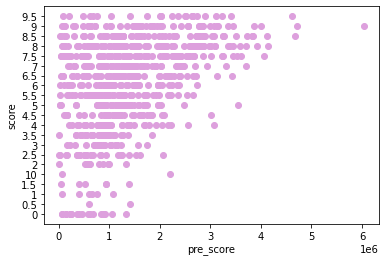

In [103]:
plt.plot(data['pre_score'],data['CK'],'o',color='plum')
plt.xlabel('pre_score')
plt.ylabel('score')
plt.show()

Nhìn vào biểu đồ ta thấy tập trung chủ yếu ở bên trái (pre_score thấp <> điểm cao). Vậy điểm precore không thể phản ánh được chính xác điểm cuối kì các bạn cao hay thấp

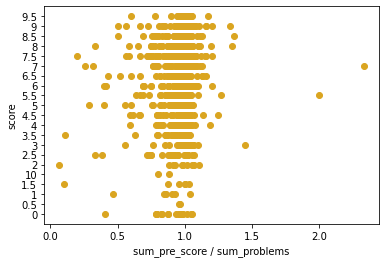

In [104]:

plt.plot(data['sum_pre_score']/data['sum_problems'], data['CK'], 'o',color='goldenrod')
plt.xlabel('sum_pre_score / sum_problems')
plt.ylabel('score')
plt.show()

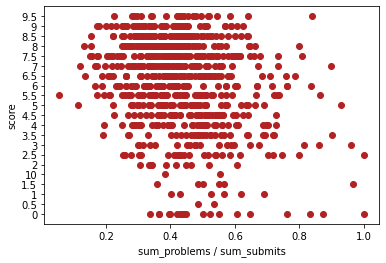

In [105]:
plt.plot(data['sum_problems']/data['sum_submits'], data['CK'] , 'o',color='firebrick')
plt.xlabel('sum_problems / sum_submits')
plt.ylabel('score')
plt.show()


tập trung chủ yếu ở 0.2- 0.8 --> dù submit nhiều hay ít thì điểm cuối kì vẫn có thể cao

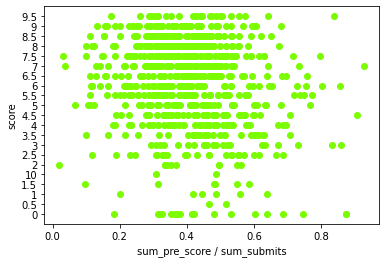

In [106]:
plt.plot(data['sum_pre_score']/data['sum_submits'], data['CK'], 'o',color='lawngreen')
plt.xlabel('sum_pre_score / sum_submits')
plt.ylabel('score')
plt.show()

#Training

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math

In [136]:
data_train = data.copy()
CK = data_train['CK']
data_train.drop(columns=['CK','user_id'],inplace = True)

In [137]:
x_train,x_test,y_train,y_test = train_test_split(data_train,CK,test_size=0.2, random_state=0)
x_train

,sum_problems,sum_submits,sum_pre_score,correct_probs,pre_score,times,percent
764,20,79,15,15,160333,5.266667,0.189873
548,102,272,102,99,1443233,2.747475,0.363971
303,171,317,170,158,2061679,2.006329,0.498423
334,87,164,70,70,1000151,2.342857,0.426829
555,109,714,110,106,4114025,6.735849,0.148459
...,...,...,...,...,...,...,...
707,183,450,176,170,2775448,2.647059,0.377778
52,62,117,56,56,648571,2.089286,0.478632
330,79,203,73,73,1170785,2.780822,0.359606
343,45,157,36,35,454832,4.485714,0.222930


In [138]:
y_train

764    2.5
548      8
303    2.5
334    7.5
555    8.5
      ... 
707      9
52     4.5
330      8
343    7.5
329    8.5
Name: CK, Length: 636, dtype: object

In [139]:
model = LinearRegression().fit(x_train,y_train)

In [144]:
y_pre = model.predict(x_test)
y_pre = np.round(y_pre*2)/2

In [145]:
y_pre

array([6.5, 5.5, 6.5, 5.5, 6.5, 5.5, 4.5, 5. , 5.5, 5.5, 8. , 8. , 8. ,
       5. , 6. , 5.5, 4. , 5.5, 5.5, 5.5, 5.5, 9.5, 9.5, 7. , 5.5, 4. ,
       5.5, 7.5, 5.5, 6. , 5.5, 5. , 5.5, 7. , 5. , 9.5, 7. , 5.5, 6. ,
       6. , 8.5, 6. , 8. , 5.5, 6. , 5.5, 6.5, 7. , 6.5, 6. , 5.5, 6. ,
       6. , 7. , 5.5, 5.5, 6.5, 7.5, 5.5, 7.5, 5.5, 8. , 6. , 7.5, 5.5,
       5. , 5.5, 5. , 5. , 8.5, 6. , 4.5, 7.5, 7. , 6. , 5.5, 6.5, 6. ,
       6.5, 6.5, 5.5, 7. , 5.5, 6.5, 9.5, 6. , 5.5, 5. , 6. , 5.5, 7.5,
       7.5, 6. , 8. , 6. , 6.5, 4.5, 5.5, 5.5, 5. , 6. , 5. , 7. , 6. ,
       8. , 7. , 5.5, 5. , 5.5, 7.5, 5.5, 8.5, 7.5, 5.5, 6. , 6. , 7.5,
       5.5, 5.5, 6. , 5. , 6.5, 6. , 6. , 5.5, 6.5, 5. , 6. , 6.5, 5.5,
       9. , 5.5, 7.5, 7. , 6.5, 7.5, 5. , 7.5, 8. , 8.5, 6. , 5. , 5.5,
       5. , 5.5, 5.5, 5.5, 6.5, 5. , 5. , 7.5, 4.5, 5.5, 6.5, 5.5, 6. ,
       7. , 5.5, 4.5])

In [146]:
mse = metrics.mean_squared_error(y_test, y_pre)
print('MSE : ',mse)

MSE :  3.9952830188679247
